NAME : GEETHAARUMUGAM

REG NO: SIRSS1270

TASK : 11 (Leaf Classification)

REGEX- ML & DL INTERN - MAY-2021

In [47]:
import os
os.chdir('D:\\Mohankumar files\\REGEX Project 1')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report # accuracy_score
from sklearn.metrics import accuracy_score

In [3]:
leaf = pd.read_csv('train.csv')
leaf.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [4]:
leaf.shape

(990, 194)

In [5]:
leaf.describe()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,799.595960,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,452.477568,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,415.250000,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,802.500000,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,1195.500000,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,1584.000000,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [6]:
leaf.columns

Index(['id', 'species', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5',
       'margin6', 'margin7', 'margin8',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=194)

In [7]:
leaf.isnull().sum()

id           0
species      0
margin1      0
margin2      0
margin3      0
            ..
texture60    0
texture61    0
texture62    0
texture63    0
texture64    0
Length: 194, dtype: int64

In [8]:
duplicate = leaf.duplicated()
print('No Of Duplicate Variables:',duplicate.sum())
leaf[duplicate]# removed the duplicates

No Of Duplicate Variables: 0


,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64


In [9]:
leaf.corr()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,1.000000,-0.011673,-0.027565,-0.059533,0.001639,-0.002419,-0.051818,0.061214,-0.039509,-0.070954,...,-0.040292,-0.005132,-0.043101,0.063337,-0.007915,-0.000823,0.026319,0.032873,0.024299,0.035396
margin1,-0.011673,1.000000,0.806390,-0.182829,-0.297807,-0.475874,0.767718,0.066273,-0.094137,-0.181496,...,0.137158,-0.047771,0.126227,-0.024139,-0.168201,0.035072,-0.007581,-0.033159,-0.075171,0.030414
margin2,-0.027565,0.806390,1.000000,-0.204640,-0.315953,-0.444312,0.825762,-0.083273,-0.086428,-0.120276,...,0.154407,-0.021096,0.123834,-0.063654,-0.157842,0.081069,-0.007057,-0.037405,-0.098957,-0.029532
margin3,-0.059533,-0.182829,-0.204640,1.000000,0.120042,-0.185007,-0.163976,0.095449,0.024350,-0.000042,...,0.047347,-0.027618,0.007261,-0.021390,0.033505,-0.019850,0.084957,-0.081999,-0.148193,0.061780
margin4,0.001639,-0.297807,-0.315953,0.120042,1.000000,0.029480,-0.261437,-0.268271,-0.047693,0.227543,...,-0.071974,-0.009537,-0.050529,-0.044318,0.088857,-0.052317,0.320644,-0.073886,0.050970,0.014343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
texture60,-0.000823,0.035072,0.081069,-0.019850,-0.052317,0.006542,0.066262,-0.034094,0.048647,-0.028292,...,-0.129365,0.004412,-0.155187,0.240704,-0.183369,1.000000,-0.051838,0.265879,-0.089679,-0.190194
texture61,0.026319,-0.007581,-0.007057,0.084957,0.320644,-0.109229,-0.050498,-0.163375,-0.079283,0.088517,...,-0.002235,0.053707,-0.072814,-0.084638,-0.023539,-0.051838,1.000000,-0.063582,-0.068065,0.036374
texture62,0.032873,-0.033159,-0.037405,-0.081999,-0.073886,0.151675,-0.031555,0.015391,-0.048843,-0.031954,...,-0.217239,0.171577,-0.283316,0.563088,-0.128010,0.265879,-0.063582,1.000000,-0.058189,-0.245527
texture63,0.024299,-0.075171,-0.098957,-0.148193,0.050970,0.022299,-0.132087,-0.001364,0.027758,-0.119494,...,-0.207887,0.002057,-0.064724,-0.059866,0.156568,-0.089679,-0.068065,-0.058189,1.000000,0.029305


In [10]:
x = leaf.drop(['id', 'species'], axis = 1).values
x

array([[0.007812, 0.023438, 0.023438, ..., 0.004883, 0.      , 0.025391],
       [0.005859, 0.      , 0.03125 , ..., 0.000977, 0.039062, 0.022461],
       [0.005859, 0.009766, 0.019531, ..., 0.      , 0.020508, 0.00293 ],
       ...,
       [0.001953, 0.003906, 0.      , ..., 0.027344, 0.      , 0.001953],
       [0.      , 0.      , 0.046875, ..., 0.      , 0.001953, 0.00293 ],
       [0.023438, 0.019531, 0.03125 , ..., 0.023438, 0.025391, 0.022461]])

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_fit = encoder.fit(leaf['species'])
y_label = y_fit.transform(leaf['species']) 
classes = list(y_fit.classes_) 
classes


['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

<AxesSubplot:xlabel='count', ylabel='species'>

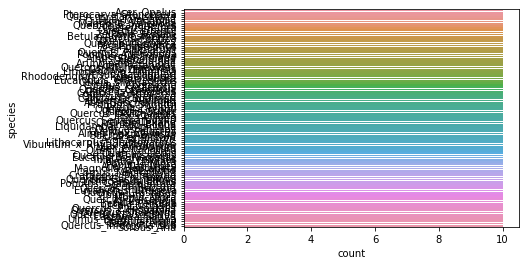

In [12]:
sns.countplot(y ='species', data = leaf)

<AxesSubplot:>

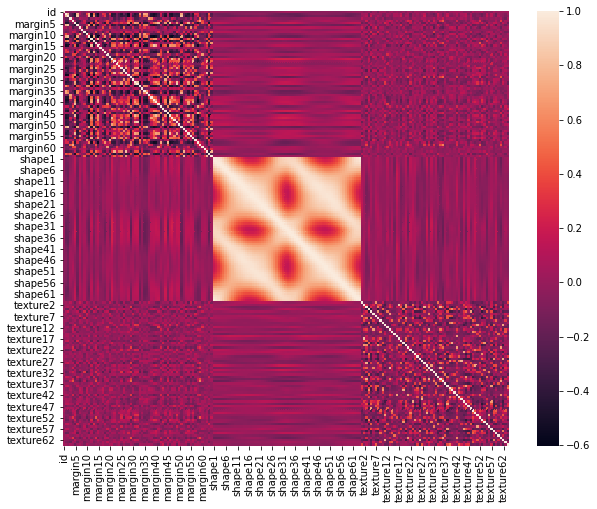

In [13]:
plt.figure(figsize = (10,8))
sns.heatmap(data = leaf.corr())

In [14]:
leaf['species'].value_counts()

Crataegus_Monogyna     10
Acer_Pictum            10
Sorbus_Aria            10
Cotinus_Coggygria      10
Quercus_Canariensis    10
                       ..
Acer_Opalus            10
Betula_Pendula         10
Quercus_Texana         10
Arundinaria_Simonii    10
Acer_Platanoids        10
Name: species, Length: 99, dtype: int64

In [16]:
label = LabelEncoder().fit(leaf['species'])

In [17]:
y = label.transform(leaf['species'])
y

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 36, 27, 94, 88,
       12, 28, 21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48,
       47, 64, 81, 83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,
        4, 84, 36, 35, 72, 60, 71, 72, 52, 50, 54, 11, 51, 18, 47,  5,  8,
       37, 97, 20, 33,  1, 59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54,
       93, 10, 46, 59, 84, 76, 15, 10, 15,  0, 69,  4, 51, 51, 94, 36, 39,
       62,  2, 24, 26, 35, 25, 87,  0, 55, 34, 38,  1, 45,  7, 93, 56, 38,
       21, 51, 75, 81, 74, 33, 20, 37,  9, 40, 60, 31, 83, 50, 71, 67, 30,
       66,  1, 43, 61, 23, 65, 84, 87, 46, 57, 16,  2, 28, 12, 96, 44, 76,
       29, 75, 41, 87, 67, 61, 30,  5, 12, 62,  3, 83, 81,  6, 85,  4, 37,
       57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40, 17, 51, 16, 42, 63, 86,
       37, 69, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,  9, 26, 44, 60, 13,
       14, 77, 13, 80, 87

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler =StandardScaler().fit(x)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
clf=RandomForestClassifier()

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75)

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [25]:
y_pred=clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 2]]


In [26]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9798387096774194
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         2
        

C:\Users\DELL INSPIRON 15R\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
os.chdir('D:\\Mohankumar files\\REGEX Project 1')


In [31]:
test_leaf=pd.read_csv('test.csv')
test_leaf.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [34]:
test_leaf = test_leaf.pop('id')

In [37]:
x_test= test_leaf.values
x_test

array([   4,    7,    9,   12,   13,   16,   19,   23,   24,   28,   33,
         36,   39,   41,   44,   46,   47,   51,   52,   53,   57,   59,
         62,   65,   68,   70,   74,   77,   79,   86,   89,   90,   91,
         93,   94,   95,   96,   97,   98,   99,  102,  104,  105,  110,
        111,  112,  113,  114,  117,  119,  121,  123,  125,  126,  128,
        131,  135,  136,  137,  138,  141,  144,  147,  150,  151,  154,
        156,  157,  158,  159,  161,  162,  170,  172,  174,  176,  177,
        180,  181,  182,  184,  185,  187,  191,  192,  193,  195,  197,
        200,  205,  207,  208,  209,  210,  213,  220,  221,  222,  223,
        226,  229,  230,  232,  234,  236,  244,  250,  251,  254,  255,
        261,  264,  266,  271,  272,  274,  276,  277,  279,  281,  284,
        285,  287,  292,  293,  295,  296,  297,  299,  300,  301,  305,
        308,  312,  313,  316,  318,  320,  332,  337,  343,  346,  347,
        351,  352,  353,  359,  361,  368,  370,  3

In [43]:
y_test= test_leaf.values
y_test

array([   4,    7,    9,   12,   13,   16,   19,   23,   24,   28,   33,
         36,   39,   41,   44,   46,   47,   51,   52,   53,   57,   59,
         62,   65,   68,   70,   74,   77,   79,   86,   89,   90,   91,
         93,   94,   95,   96,   97,   98,   99,  102,  104,  105,  110,
        111,  112,  113,  114,  117,  119,  121,  123,  125,  126,  128,
        131,  135,  136,  137,  138,  141,  144,  147,  150,  151,  154,
        156,  157,  158,  159,  161,  162,  170,  172,  174,  176,  177,
        180,  181,  182,  184,  185,  187,  191,  192,  193,  195,  197,
        200,  205,  207,  208,  209,  210,  213,  220,  221,  222,  223,
        226,  229,  230,  232,  234,  236,  244,  250,  251,  254,  255,
        261,  264,  266,  271,  272,  274,  276,  277,  279,  281,  284,
        285,  287,  292,  293,  295,  296,  297,  299,  300,  301,  305,
        308,  312,  313,  316,  318,  320,  332,  337,  343,  346,  347,
        351,  352,  353,  359,  361,  368,  370,  3

# THANK YOU